**CURSO**: *Machine Learning* en Geociencias<br />
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />
**Credits**: The content of this notebook is taken from several sources, such as Matteo Courthoud, Abhinav Prakash and Cornellius Yudha Wijayain towardsdatascience, and *Machine Learning Mastery*. Every effort has been made to trace copyright holders of the materials used in this notebook. The author apologies for any unintentional omissions and would be pleased to add an acknowledgment in future editions.

# 06 Selección de variables

In [4]:
import numpy as np
import pandas as pd

In [55]:
data= pd.read_excel('https://github.com/edieraristizabal/MachineLearning/blob/master/data/Torrencialidad_DB_vf.xlsx?raw=true', sheet_name='cluster', engine='openpyxl')
data.tail(5)

,Mean Basin Slope,Relief Ratio,Form Factor,Melton Index,Relief,Leght of overland flow,Drainage Density,Constant Channel mantenance,Drainage Intensity,Stream Frequency,...,Perimeter,Elongation Ratio,Circularity Ratio,Compactness Coefficient,Texture Ratio,Fitness Ratio,Wandering ratio,Stream Frequency.1,Rudgeness Number,Flash flood record
68,15.250,0.074091,0.061792,0.363366,1.970,0.552729,0.904603,1.105457,0.225657,0.204130,...,40.854,0.280493,0.221302,2.140838,0.122387,0.474862,0.889500,0.204130,1.782068,NAB
69,24.740,0.009269,0.113525,0.145172,3.442,0.756900,0.660589,1.513801,0.355458,0.234812,...,148.112,0.380190,0.322021,1.774738,0.715675,0.451726,0.950788,0.234812,2.273747,NAB
70,25.196,0.067981,0.194978,0.285303,1.576,0.658112,0.759750,1.316223,0.388216,0.294947,...,32.567,0.498250,0.361538,1.674941,0.245647,0.311542,0.811031,0.294947,1.197365,NAB
71,25.220,0.071111,0.182145,0.300709,2.033,0.799381,0.625484,1.598762,0.314806,0.196906,...,38.141,0.481575,0.394828,1.602773,0.157311,0.366430,0.882268,0.196906,1.271609,NAB
72,17.086,0.110327,0.276545,0.189486,0.563,0.864981,0.578047,1.729963,0.783853,0.453104,...,14.635,0.593387,0.517949,1.399371,0.204988,0.224394,0.581239,0.453104,0.325441,NAB


In [12]:
data.columns

Index(['Mean Basin Slope', 'Relief Ratio', 'Form Factor', 'Melton Index',
       'Relief', 'Leght of overland flow', 'Drainage Density',
       'Constant  Channel mantenance', 'Drainage Intensity',
       'Stream Frequency', 'Infiltrarion Number', 'Area ', 'Ro Coefficient',
       'Stream Lenght', 'Main Stream Leght ', 'Stream Lenght Ratio',
       'Bifurcation Ratio ', 'Lenght of Basin', 'Perimeter',
       'Elongation Ratio', 'Circularity Ratio', 'Compactness Coefficient',
       'Texture Ratio', 'Fitness Ratio', 'Wandering ratio',
       'Stream Frequency.1', 'Rudgeness Number', 'Flash flood record'],
      dtype='object')

In [56]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le=LabelEncoder()
data["Flash flood record"]=le.fit_transform(data["Flash flood record"])
data.head()

,Mean Basin Slope,Relief Ratio,Form Factor,Melton Index,Relief,Leght of overland flow,Drainage Density,Constant Channel mantenance,Drainage Intensity,Stream Frequency,...,Perimeter,Elongation Ratio,Circularity Ratio,Compactness Coefficient,Texture Ratio,Fitness Ratio,Wandering ratio,Stream Frequency.1,Rudgeness Number,Flash flood record
0,24.320,0.223408,0.147258,0.582183,1.319,0.515155,0.970583,1.030309,0.602168,0.584454,...,12.454,0.433006,0.415876,1.561689,0.160591,0.325036,0.685637,0.584454,1.280198,0
1,28.100,0.219618,0.168967,0.534278,1.968,1.032682,0.484176,2.065365,0.456670,0.221108,...,18.516,0.463828,0.497315,1.428106,0.108015,0.323882,0.669233,0.221108,0.952858,0
2,28.860,0.120483,0.137870,0.324482,2.484,0.919901,0.543537,1.839802,0.376731,0.204767,...,47.543,0.418977,0.325805,1.764400,0.189302,0.381066,0.878741,0.204767,1.350146,0
3,20.669,0.125434,0.232704,0.260024,0.903,0.227900,2.193947,0.455800,1.171624,2.570481,...,17.075,0.544323,0.519799,1.396877,1.464129,0.360293,0.854563,2.570481,1.981134,0
4,17.790,0.136407,0.117966,0.397153,1.299,0.513981,0.972799,1.027962,0.384357,0.373902,...,20.898,0.387554,0.307824,1.815201,0.143554,0.351708,0.771816,0.373902,1.263665,0


In [57]:
X=data.drop(['Flash flood record'],axis=1)
y=data['Flash flood record']

## Selección de variables con *Variance Threshold Feature Selection*
Este método es útil para modelos no supervisados, ya que sólo utiliza como criterio la mayor varianza en las variables. Si el valor del umbral es 0 remueve solo las variables de varianza constante. Utilizar un umbral de 0.01 significa eliminar las columnas donde el 99% de los valores son similares.

In [129]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.25)
selector.fit(X)
X.columns[selector.get_support()]

Index(['Mean Basin Slope', 'Relief', 'Drainage Density', 'Stream Frequency',
       'Infiltrarion Number', 'Area ', 'Ro Coefficient', 'Stream Lenght',
       'Main Stream Leght ', 'Stream Lenght Ratio', 'Bifurcation Ratio ',
       'Lenght of Basin', 'Perimeter', 'Texture Ratio', 'Stream Frequency.1',
       'Rudgeness Number'],
      dtype='object')

## Selección de variables univariado

Este método univariable utiliza para seleccionar las variables que tenga la relación mas fuerte con la variable dependiente. Permite seleccionar diferentes *test estadísticos* para seleccionar el número de variables especificado.

Para regresión permite utilizar como *score_func* métodos como *f_regression*, *mutual_info_regression*, y para problemas de clasificación *chi2*, f*_classif*, *mutual_info_classif*. El argumento *k* define el número de variables que deben permanecer eliminando las otras de menor desempeño segun el *score_func*.

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [23]:
variables = SelectKBest(score_func=mutual_info_regression, k=4)
variables.fit(X,y)
X.columns[selector.get_support()]

Index(['Relief Ratio', 'Stream Frequency', 'Infiltrarion Number',
       'Stream Frequency.1'],
      dtype='object')

## Selección de variables con *Recursive Feature Elimination (RFE)*

En este métodos se utiliza un modelo de *machine learning* para seleccionar las variables, eliminando las de menor importancia en un proceso iterativo. El argumento *step* corresponde al número de variables eliminadas en cada iteración.

In [25]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
rfe=RFE(estimator=LogisticRegression(),n_features_to_select = 2, step = 1)
fit=rfe.fit(X,y)
print(fit.n_features_)
print(fit.support_)
print(fit.ranking_)

## Selección de variables con *SelectFromModel*

Este modelo es similar al *RFE*, la diferencia radica en que este está basado en la importancia de los atributos, utilizando como umbral por defecto la media. Como resultado entrega las variables que pasan el umbral.

In [31]:
from sklearn.feature_selection import SelectFromModel
sfm_selector = SelectFromModel(estimator=LogisticRegression())
sfm_selector.fit(X, y)
X.columns[sfm_selector.get_support()]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Index(['Relief Ratio', 'Melton Index', 'Relief', 'Drainage Density',
       'Drainage Intensity', 'Infiltrarion Number', 'Main Stream Leght ',
       'Lenght of Basin', 'Rudgeness Number'],
      dtype='object')

## Selección de variables con *Sequential Feature Selection* (SFS)
Este método utiliza validación cruzada y se desplaza hacia delante (*SFS-Forward*) o atras (*SFS-Backward*) para seleccionar las mejores variables. Inicia con cero variables y encuentra la que mejor optimiza la métrica de la validación cruzada, de esta forma selecciona esta variable y repite el procedimiento para la segunda y demas variables.

In [32]:
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
sfs_selector = SequentialFeatureSelector(estimator=LogisticRegression(), n_features_to_select = 3, cv =10, direction ='backward')
sfs_selector.fit(X, y)
X.columns[sfs_selector.get_support()]

## Selección de variables con ELI5
Este método evalua la importancia de cada variable utilizando la *sensitivity* permutando aleatoriamente los valores de las variables.

In [ ]:
!pip install eli5

In [37]:
import eli5
from eli5.sklearn import PermutationImportance

In [40]:
model = LogisticRegression()
model.fit(X,y)
perm = PermutationImportance(model, random_state=1).fit(X, y)
eli5.show_weights(model)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Weight?,Feature
+0.677,x8
+0.610,x26
+0.580,x6
+0.448,x14
+0.326,x16
+0.318,x24
+0.307,x19
+0.290,<BIAS>
+0.260,x25
+0.260,x9


## Selección de variables con un modelo ensamblado

In [ ]:
!pip install shap

In [43]:
import shap
from sklearn.ensemble import RandomForestRegressor

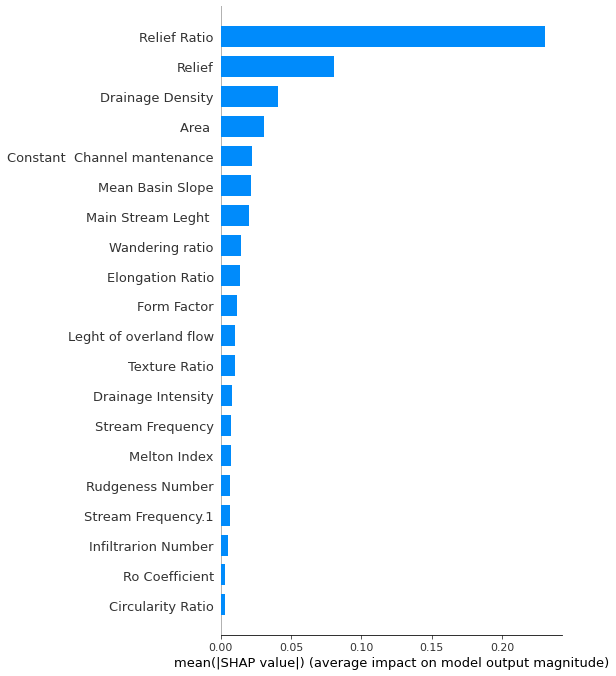

In [44]:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X, y)
shap_values = shap.TreeExplainer(model).shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

## Two groups - Tests
During the EDA, we have seen different ways to visualize differences between distributions for landslides and no-landslides. However, we might want to be more rigorous and try to assess the statistical significance of the difference between the distributions, i.e. answer the question “is the observed difference systematic or due to sampling noise?”.

We are now going to analyze different tests to discern two distributions from each other.

* T-test. The first and most common test is the student t-test. T-tests are generally used to compare means. In this case, we want to test whether the means of the income distribution are the same across the two groups. The test statistic for the two-means comparison test is given by:

$stat=\frac{|\overline{x_1}-\overline{x_2}|}{\sqrt{s^2 / n}}$

Where x̅ is the sample mean and s is the sample standard deviation. Under mild conditions, the test statistic is asymptotically distributed as a Student t distribution.

We use the ttest_ind function from scipy to perform the t-test. The function returns both the test statistic and the implied p-value.

In [115]:
from scipy import stats

Relief_n=data[data["Flash flood record"]==0]
Relief_y=data[data["Flash flood record"]==1]

In [116]:
a = (56, 128.6, 12, 123.8, 64.34, 78, 763.3)
b = (1.1, 2.9, 4.2)

In [121]:
stat, p_value = stats.ttest_ind(Relief_n["Perimeter"],Relief_y["Perimeter"])
print(f"t-test: statistic={stat:.4f}, p-value={p_value:.4f}")

t-test: statistic=0.9984, p-value=0.3215


The p-value of the test is >0.05, therefore we do not reject the null hypothesis of no difference in means across landslide and no-landslide groups.

The t-test assumes that the variance in the two samples is the same so that its estimate is computed on the joint sample. Welch’s t-test allows for unequal variances in the two samples.

* Standardized Mean Difference (SMD). In general, it is good practice to always perform a test for differences in means on all variables across the treatment and control group, when we are running a randomized control trial or A/B test.

However, since the denominator of the t-test statistic depends on the sample size, the t-test has been criticized for making p-values hard to compare across studies. In fact, we may obtain a significant result in an experiment with a very small magnitude of difference but a large sample size while we may obtain a non-significant result in an experiment with a large magnitude of difference but a small sample size.

One solution that has been proposed is the standardized mean difference (SMD). As the name suggests, this is not a proper test statistic, but just a standardized difference, which can be computed as:

$SMD=\frac{|\overline{x_1}-\overline{x_2}|}{\sqrt{s^{2}_1 + s^{2}_2 / 2}}$

Usually, a value below 0.1 is considered a “small” difference. It is good practice to collect average values of all variables across treatment and control groups and a measure of distance between the two — either the t-test or the SMD — into a table that is called balance table. We can use the create_table_one function from the causalml library to generate it. As the name of the function suggests, the balance table should always be the first table you present when performing an A/B test.

In [122]:
from causalml.match import create_table_one

df['test'] = df['Flash flood record']==1
create_table_one(df, 'test', df.columns)

ModuleNotFoundError: ignored

In the first two columns, we can see the average of the different variables across the treatment and control groups, with standard errors in parenthesis. In the last column, the values of the SMD indicate a standardized difference of more than 0.1 for all variables, suggesting that the two groups are probably different.